<center> <h1> <b>BIRDSONGS<b></h1> </center>
<center> <h1>Syllable Tutorial</h1> </center>

# Define Objects

Import package and define matplotlib backend

In [31]:
# the following line enable interact with figures,  
# you can make zoom and save images from a poup matplotlib window
# to select points: qt ipympl tk. To just visualize: notebook
%matplotlib ipympl

import birdsongs as bs
from birdsongs.util import *

Define directories path and show audio files

In [32]:
# root_path   = "path_to_repository\\'
audios_path = "audios"

paths  = bs.Paths(audios_path=audios_path, catalog=False)      # root_path, audios_path, catalog
ploter = bs.Ploter(save=False)   # to save figures save=True 
#paths.AudioFiles(True)#[['ML Catalog Number', 'Scientific Name', 'Year', 'Country-State-County', 'Country', 'State', 'Locality', 'Latitude']]#.head()
paths.ShowFiles()#.head()

['XC105227 - Rufous-collared Sparrow - Zonotrichia capensis.wav',
 'XC465157 - Rufous-collared Sparrow - Zonotrichia capensis.wav',
 'XC11293 - Rufous-collared Sparrow - Zonotrichia capensis.wav',
 'XC506362 - Rufous-collared Sparrow - Zonotrichia capensis.wav',
 'XC104508 - Ocellated Tapaculo - Acropternis orthonyx.wav',
 'humman.wav',
 'XC418630 - Rufous-collared Sparrow - Zonotrichia capensis.wav',
 'XC428484 - Ocellated Tapaculo - Acropternis orthonyx.wav',
 'XC513182 - Rufous-collared Sparrow - Zonotrichia capensis.wav',
 'XC53516 - Rufous-collared Sparrow - Zonotrichia capensis.wav',
 'XC338156 - Rufous-collared Sparrow - Zonotrichia capensis costaricensis.wav',
 'XC390322 - Rufous-collared Sparrow - Zonotrichia capensis.wav',
 'XC342564 - Rufous-collared Sparrow - Zonotrichia capensis.wav',
 'XC53067 - Rufous-collared Sparrow - Zonotrichia capensis.wav',
 'XC576070 - Rufous-collared Sparrow - Zonotrichia capensis.wav',
 'XC101564 - Rufous-collared Sparrow - Zonotrichia capensis 

In [33]:
#selected = paths.AudioFiles(False)[(paths.AudioFiles(False)['Country'] == 'Brazil')][['ML Catalog Number', 'Scientific Name', 'Year', 'Country-State-County', 'Country', 'State', 'Locality', 'Latitude']]
#selected = selected[(paths.AudioFiles(False)['State'] != 'Lima')]#[['ML Catalog Number', 'Scientific Name', 'Year', 'Country-State-County', 'Country', 'State', 'Locality', 'Latitude']]
#selected#["State"]#.iloc[0]["ML Catalog Number"]
#print(len(selected))

In [34]:
#paths.AudioFiles().loc[paths.AudioFiles()['Country'] == 'Argentina']

Define, visualize and hear birdsong. The same funcion allow to us select the time of interest enabling SelectTime_on option

/home/sebas/anaconda3/lib/python3.11/site-packages/birdsongs-0.1b0-py3.11.egg/birdsongs/ploter.py:108: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.


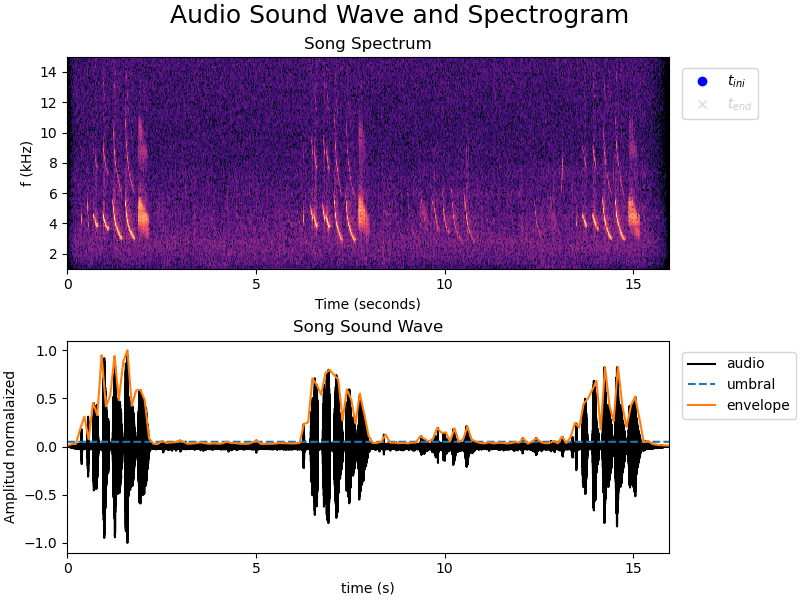

In [35]:
birdsong = bs.BirdSong(paths, file_id="XC53067",# dict=["Col", "DC"],
                       Nt=5000, NN=512, flim=(1e3,15e3), #tlim=(0.,7)
                       )
print(birdsong.state, birdsong.country)
ploter.Plot(birdsong, FF_on=False, SelectTime_on=True)
AudioPlay(birdsong)

In [36]:
time_interval = np.array([1.2023, 1.4600])
#time_interval = Positions(ploter.klicker)[0]
print("Time interval selected: initial time {:.4f} s, final time {:.4f} s".format(time_interval[0], time_interval[1]))

Time interval selected: initial time 1.2023 s, final time 1.4600 s


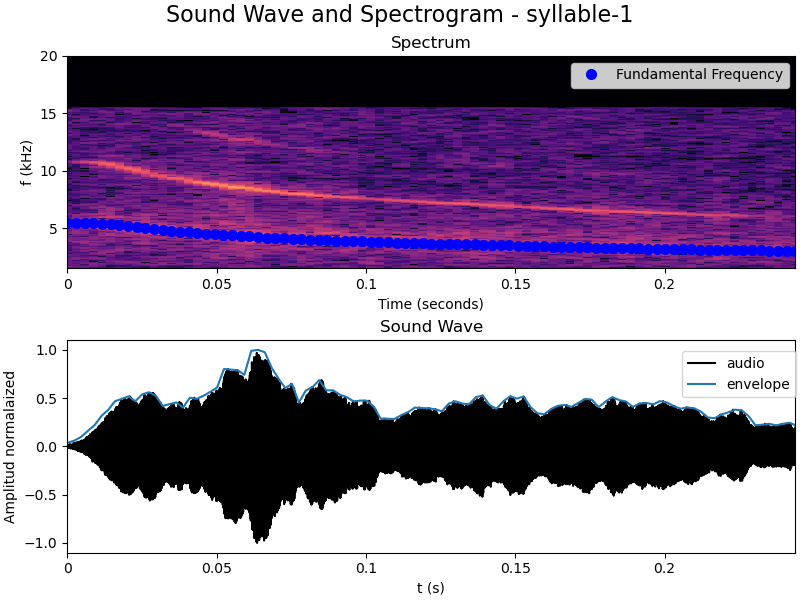

In [43]:
syllable = bs.Syllable(birdsong, tlim=time_interval, umbral_FF=1.05, no_syllable=1, type="intro-down") # flim=birdsong.flim,  NN=birdsong.NN,
ploter.Plot(syllable, FF_on=True)
AudioPlay(syllable)

In [38]:
#plt.figure(); plt.plot(syllable.FF, 'o'); plt.show(); plt.ylim((0, 3.5e4));
#syllable.FF

3D plot (in process)

In [39]:
# ploter.Plot3d(birdsong)

In [40]:
# ploter.Plot(birdsong, FF_on=False, syllable=syllable)

Define syllable with the default syllable extractor

In [41]:
# no_syllable    = int(input("Enter the syllable number (1 to {0}): ".format(bird.no_syllables)))
# syllable       = birdsong.Syllable(no_syllable=3)
# ploter.Plot(syllable)
# AudioPlay(syllable)

In [42]:
# ploter.Plot(birdsong, FF_on=False, syllable_on=True, chunck_on=False)

# Optimal Synthetic Syllable

Define optimization method and its parameters 

In [13]:
brute     = {'method':'brute', 'Ns':6}  # , "workers":-1
optimizer = bs.Optimizer(syllable, method_kwargs=brute)
#?lmfit.minimize

Find optimal $\gamma$ for all the syllables computed by the syllables extractor. You can also just find the optimal for the single syllable

In [14]:
# optimal_gamma = optimizer.OptimalGamma(syllable)
optimal_gamma = 37000 # optimizer.AllGammas(birdsong)
syllable.p["gm"].set(value=optimal_gamma)

In [15]:
syllable.p

Parameters([('a0', <Parameter 'a0', value=0.11 (fixed), bounds=[0.01:0.25]>), ('a1', <Parameter 'a1', value=0.0 (fixed), bounds=[-2:2]>), ('a2', <Parameter 'a2', value=0.0 (fixed), bounds=[0:2]>), ('b0', <Parameter 'b0', value=-0.1 (fixed), bounds=[-1:0.5]>), ('b1', <Parameter 'b1', value=1 (fixed), bounds=[0:2]>), ('b2', <Parameter 'b2', value=0.0 (fixed), bounds=[0:2]>), ('gm', <Parameter 'gm', value=37000 (fixed), bounds=[10000.0:100000.0]>)])

Optimal $\alpha$ and $\beta$

In [16]:
#              [a0, a1, a2, b0, b1, b2]
#syllable.Set([0.154, 0, 0, -0.4, 1, 1.4])
# syllable.p["b2"].set(value=2)

In [17]:
optimizer.OptimalParams(syllable, Ns=6)

As
$a_0*$=0.2020, t=1.0113 min
Bs
$b_0*$=-0.4000,
b_2*=1.2000, t=5.1661 min
$b_1*$=1.2000, t=0.9828 min
end
Time of execution = 7.1602 minutes


Display optimal parameters and generate a synthetic syllable 

In [18]:
Display(syllable.p)
synth_syllable = syllable.Solve(syllable.p)

Parameters([('a0', <Parameter 'a0', value=0.202 (fixed), bounds=[0.01:0.25]>), ('a1', <Parameter 'a1', value=0.0 (fixed), bounds=[-2:2]>), ('a2', <Parameter 'a2', value=0.0 (fixed), bounds=[0:2]>), ('b0', <Parameter 'b0', value=-0.4 (fixed), bounds=[-1:0.5]>), ('b1', <Parameter 'b1', value=1.2000000000000002 (fixed), bounds=[0:2]>), ('b2', <Parameter 'b2', value=1.2000000000000002 (fixed), bounds=[0:2]>), ('gm', <Parameter 'gm', value=37000 (fixed), bounds=[10000.0:100000.0]>)])

Visualize and plot the synthetic syllable

/home/sebas/anaconda3/lib/python3.11/site-packages/birdsongs-0.1b0-py3.11.egg/birdsongs/ploter.py:69: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
/home/sebas/anaconda3/lib/python3.11/site-packages/birdsongs-0.1b0-py3.11.egg/birdsongs/ploter.py:92: UserWarning: The figure layout has changed to tight


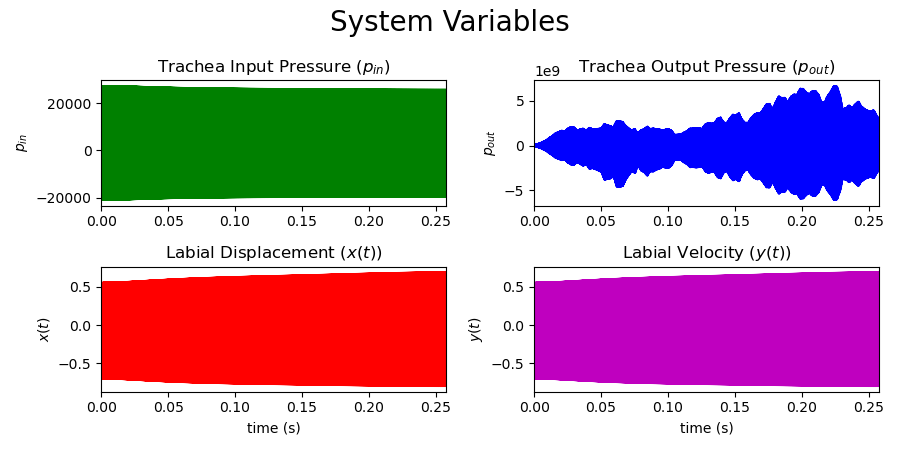

In [19]:
ploter.PlotVs(synth_syllable);

/home/sebas/anaconda3/lib/python3.11/site-packages/birdsongs-0.1b0-py3.11.egg/birdsongs/ploter.py:22: UserWarning: The figure layout has changed to tight


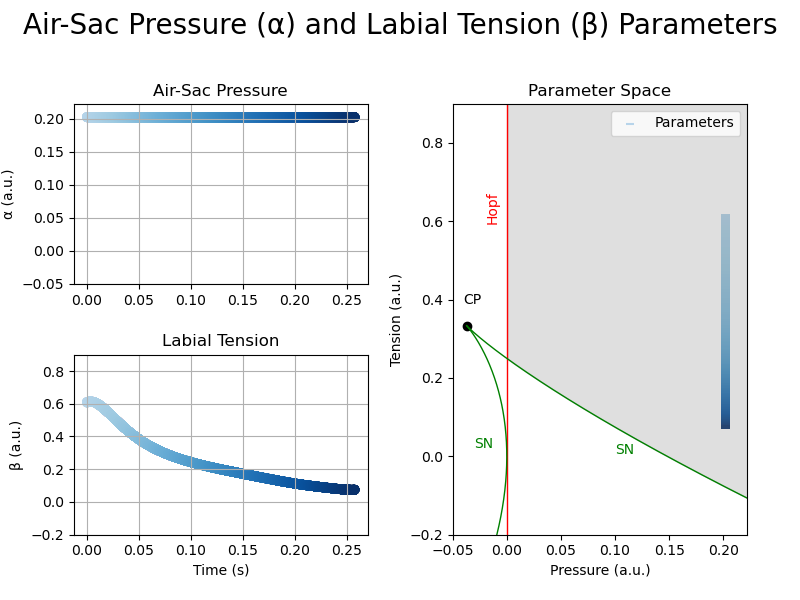

In [26]:
ploter.PlotAlphaBeta(synth_syllable);

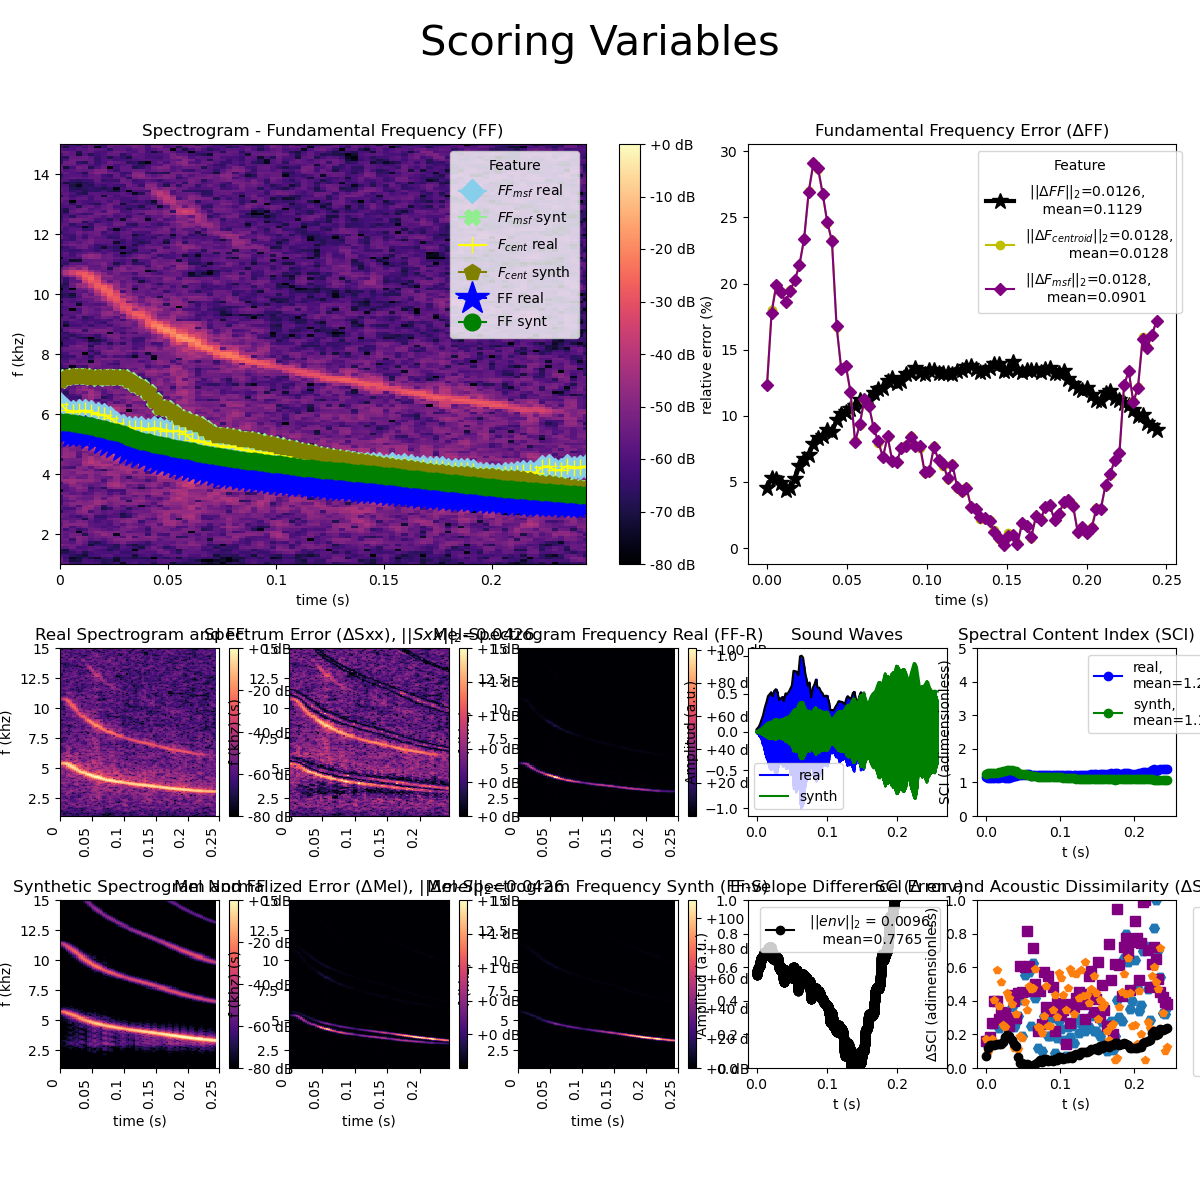

In [27]:
ploter.Result(syllable, synth_syllable, figsize=(12,12));

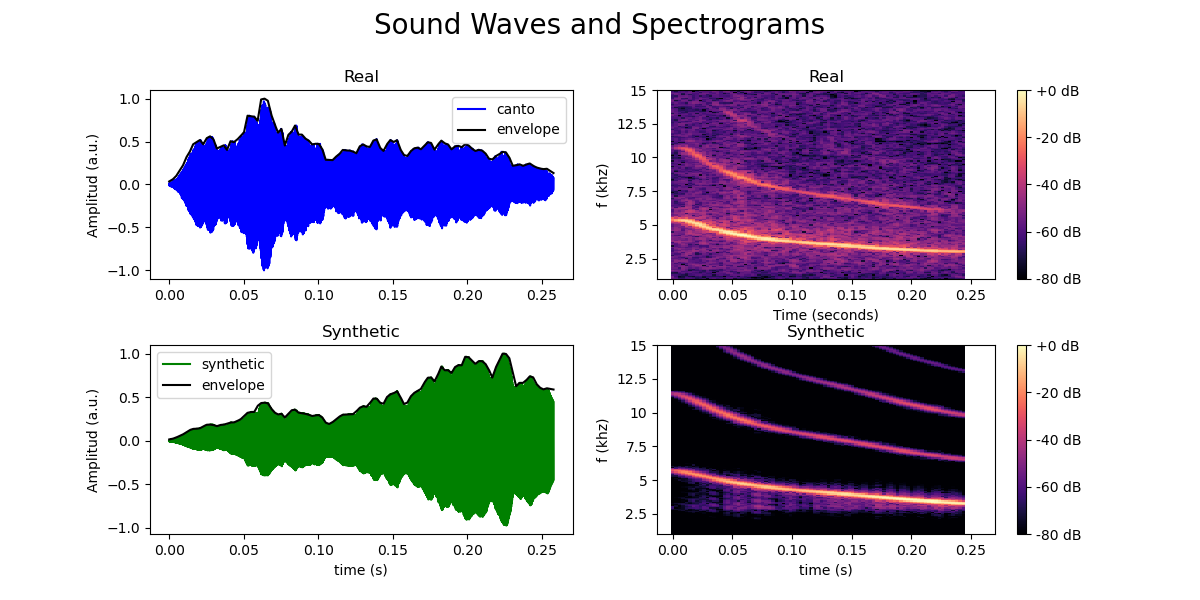

No such comm: dd92a6bc17aa4fada64ea8ef8fba3fd5


In [22]:
ploter.Syllables(syllable, synth_syllable);

In [28]:
AudioPlay(syllable)

In [29]:
AudioPlay(synth_syllable)

Write synthetic and real syllables

In [30]:
syllable.ExportMotorGestures()
syllable.WriteAudio();  synth_syllable.WriteAudio();

/home/sebas/anaconda3/lib/python3.11/site-packages/scikit_maad-1.4.0-py3.11.egg/maad/sound/input_output.py:402: UserWarning: Values for bit depth should be 8, 16 or 32. Argument ignored.
  warnings.warn('Values for bit depth should be 8, 16 or 32. Argument ignored.')
